In [2]:
#Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
#Loading the dataset

In [7]:
advertising = pd.read_csv("advertising.csv")

In [8]:
#Inspecting the dataset

In [9]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [10]:
advertising.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [11]:
advertising.shape

(200, 4)

In [12]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

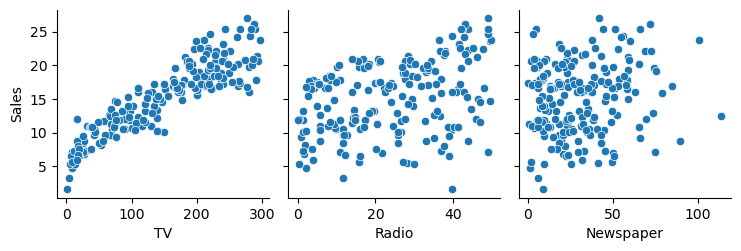

In [14]:
sns.pairplot(diag_kind=None, data= advertising, x_vars=["TV","Radio","Newspaper"], y_vars="Sales")
plt.show()

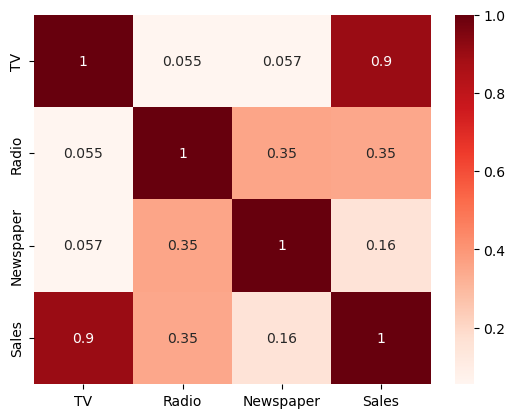

In [34]:
sns.heatmap(advertising.corr(), cmap="Reds", annot=True)
plt.show()

In [60]:
X=advertising["TV"]
y=advertising["Sales"]

In [61]:
X.head()

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


In [18]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [19]:
#importing statsmodels

In [20]:
import statsmodels
import statsmodels.api as sm

In [21]:
#import sklearn

In [22]:
import sklearn
from sklearn.model_selection import train_test_split

In [23]:
#diving the data into training and test data

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size= 0.7, random_state= 100)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140,)
(60,)
(140,)
(60,)


In [26]:
X_train_sm= sm.add_constant(X_train)

In [27]:
X_train_sm

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3
...,...,...
87,1.0,110.7
103,1.0,187.9
67,1.0,139.3
24,1.0,62.3


In [28]:
#OLS means ordinary least square
lr = sm.OLS(y_train,X_train_sm).fit()

In [29]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [30]:
#y = mx+c
#y= 0.054546 X +6.948683

In [31]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 12 Jul 2024   Prob (F-statistic):           1.52e-52
Time:                        09:52:59   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[]

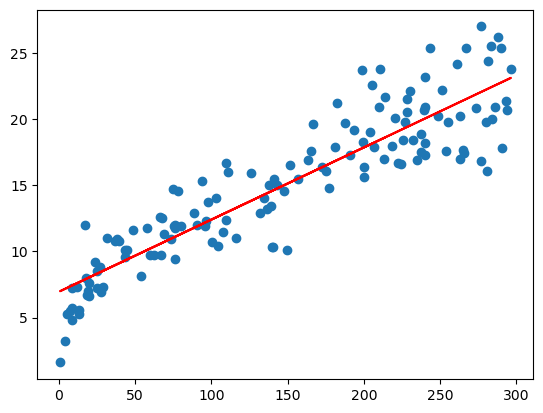

In [39]:
plt.scatter(X_train,y_train)
plt.plot(X_train,0.054546*X_train+6.948683,"r")
plt.plot()

In [ ]:
# we know that error= original value- predicticted value
# in this case= y_train-y_predicted
#to find the value of y_predicted

In [40]:
y_predicted = lr.predict(X_train_sm)

In [41]:
y_predicted

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

In [42]:
res= (y_train-y_predicted)

In [43]:
res

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64

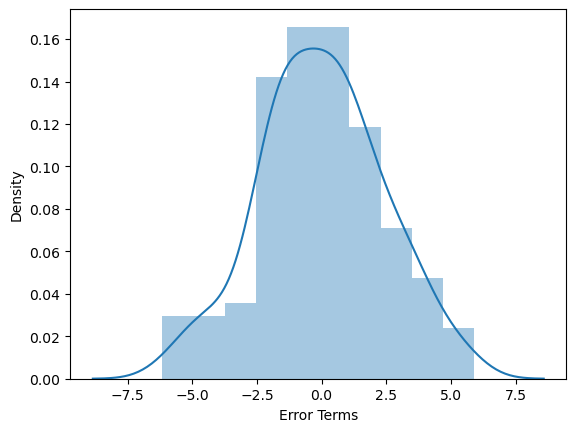

In [45]:
sns.distplot(res, bins=10)
plt.xlabel("Error Terms")
plt.show()

In [46]:
#the error terms are normally distributed

In [47]:
#the accuracy on training data is coming around 81% now let's perform it on test data

In [48]:
#add constant in test data

In [49]:
X_test_sm = sm.add_constant(X_test)

In [51]:
y_test_pred = lr.predict(X_test_sm)

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [55]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

2.019296008966233

In [57]:
r2_score(y_test,y_test_pred)

0.7921031601245658